<a href="https://colab.research.google.com/github/frank2720/DAtasks/blob/main/RAPETISATISH_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directions
Choose one of the following business problems and accompanying dataset.

<br>

| Business Problem (Prediction)| Dataset File Name |
| ----------- | ----------- |
| Income & Audit Success | [CompanyAudit.csv](https://github.com/CHill-MSU/INFO583/blob/main/CompanyAudit.csv)|
| Employee Salary & Retention| [EmployeeRetention.csv](https://github.com/CHill-MSU/INFO583/blob/main/EmployeeRetention.csv)|
| Loan Amount & Approval| [LoanApproval.csv](https://github.com/CHill-MSU/INFO583/blob/main/LoanApproval.csv)|
| Customer CLV & Marketing Campaign Success| [MarketingCampaign.csv](https://github.com/CHill-MSU/INFO583/blob/main/MarketingCampaign.csv)|
| Telecom Customer CLV & Churn | [TeleChurn.csv](https://github.com/CHill-MSU/INFO583/blob/main/TeleChurn.csv)|

<br>

**Overview:**

<br>

**Part 1**

In Part 1, you will define the business problem, cleanse and preprocess the data, perform exploratory data analysis, and perform linear regression analysis. To complete Part 1, you will fill in the required information in the [Part 1](#scrollTo=cwyEfhMwUTT1) Section.

<br>

**Part 2**

In Part 2, you will perform predictive analysis, evaluate your predictive models, and make recommendations and discuss your results within the context of the business problem. To complete Part 2, you will include all required information for Part 1 and fill in the required information in the [Part 2](#scrollTo=8fZ_eKishBVo) Section.


<hr>
<br>

# Prerequisite Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()
DATAFILE = "CompanyAudit.csv"

Saving CompanyAudit.csv to CompanyAudit (3).csv


# Part 1 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

**Note:** Your Part 1 submission will only include responses for Part 1. Part 2 should remain blank or hidden in the Part 1 submission.

<br>

**Points:** 50

<br>






## 1.1 Problem Definition & Statement (10)

**1.1 A (5) First, use the code cell below to identify your group's selected dataset and the numerical target variable (column name) that will be used in Part 1 for linear regression analysis and the categorical target variable that will be used in Part 2 for classification analysis.**

In [ ]:
# @title Identify Problem/Dataset

Dataset = 'CompanyAudit.csv' # @param ["CompanyAudit.csv", "CCDefault.csv", "CustomerChurn.csv", "EmployeeRetention.csv", "LoanApproval.csv", "MarketingCampaign.csv"]
Numerical_Target_Variable = 'Income' # @param {type:"string"}
Categorical_Target_Variable = 'AuditResult' # @param {type:"string"}

print(Dataset)
print(Numerical_Target_Variable)
print(Categorical_Target_Variable)


CompanyAudit.csv
Income
AuditResult


**1.1 B (5) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


The business problem is to predict company income and determine audit success outcomes using company financial and operational features. Predicting the numerical target (Income) helps finance teams forecast revenues, budget appropriately, and detect anomalous patterns that might require audit attention. Predicting the categorical target (AuditResult: Pass/Fail) helps the audit team prioritize files for human review, allocate audit resources efficiently, and reduce compliance risk. A good regression model reduces forecasting error and a good classification model increases audit detection precision while controlling false positives. In practice, models will be integrated into the audit workflow: regression outputs feed financial planning, while classification scores produce risk-prioritized lists for auditors. Acceptable model performance depends on business constraints; e.g., for regression we aim for R² > 0.5 (subject to dataset complexity) and for classification we aim for precision/recall > 0.7 for the positive (fail/high-risk) class, but thresholds should be set after stakeholder discussion.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (10)


**1.2 A (5) Use the code cell below (and add any additional cells, as necessary) to cleanse and preprocess the data that you will use in your analysis.**

In [ ]:
# Define helper functions and variables used in this cell
def summarize_missing(df):
    """Summarizes missing values in a DataFrame."""
    miss_pct = df.isnull().sum() / len(df) * 100
    miss_summary = pd.DataFrame({'num_missing': df.isnull().sum(), 'pct_missing': miss_pct})
    return miss_summary

def show_numeric_and_categorical(df):
    """Identifies and prints numeric and categorical columns."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
    print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
    return numeric_cols, cat_cols

# Define target variables based on user selection in cell DjKTYEvutDD1
NUM_TARGET = Numerical_Target_Variable
CAT_TARGET = 'Audit_Type' # Corrected categorical target variable name

# Load full dataset
#df = pd.read_csv('/content/DATAFILE.csv') # Incorrect file path
df = pd.read_csv('/content/CompanyAudit (1).csv') #incorrect file path
df = pd.read_csv(DATAFILE) #corrected
print("Initial shape:", df.shape)

# Basic cleaning: drop duplicate rows
duplicates = df.duplicated().sum()
if duplicates:
    df = df.drop_duplicates()
    print(f"Dropped {duplicates} duplicate rows. New shape: {df.shape}")

# Show missing summary
miss_summary = summarize_missing(df)
display(miss_summary[miss_summary['pct_missing']>0].head(50))

# For now, drop columns with >60% missing values (adjust threshold if needed)
drop_thresh = 60.0
cols_to_drop = miss_summary[miss_summary['pct_missing'] > drop_thresh].index.tolist()
if cols_to_drop:
    print("Dropping columns with >60% missing:", cols_to_drop)
    df.drop(columns=cols_to_drop, inplace=True)

# Recompute numeric and categorical columns
numeric_cols, cat_cols = show_numeric_and_categorical(df)

# Remove ID-like columns (common patterns)
id_like = [c for c in df.columns if c.lower().startswith('id') or c.lower().endswith('_id')]
if id_like:
    print("Dropping id-like columns:", id_like)
    df.drop(columns=id_like, inplace=True)
    numeric_cols, cat_cols = show_numeric_and_categorical(df)

# If targets are in the dataset, ensure they are present
assert NUM_TARGET in df.columns, f"Numerical target {NUM_TARGET} not found in dataset. Edit NUM_TARGET."
assert CAT_TARGET in df.columns, f"Categorical target {CAT_TARGET} not found in dataset. Edit CAT_TARGET."

# Separate features and targets
y_reg = df[NUM_TARGET].copy()
y_clf = df[CAT_TARGET].copy()
X = df.drop(columns=[NUM_TARGET, CAT_TARGET])

# For modeling pipelines, record numeric and categorical columns among X
X_numeric = X.select_dtypes(include=[np.number]).columns.tolist()
X_categorical = X.select_dtypes(include=['object','category','bool']).columns.tolist()
print(f"Features: {len(X.columns)} columns ({len(X_numeric)} numeric, {len(X_categorical)} categorical)")

# Build preprocessing transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Removed sparse=False
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, X_numeric),
    ('cat', cat_transformer, X_categorical)
], remainder='drop')

# Fit and transform X for model-ready arrays (will be used in sklearn pipelines later)
X_prepared = preprocessor.fit_transform(X)
print("Preprocessed feature matrix shape:", X_prepared.shape)

Initial shape: (2000, 11)


,num_missing,pct_missing
Employment,100,5.00
Occupation,101,5.05


Numeric columns (6): ['ID', 'Age', 'Income', 'Deductions', 'Hours', 'Audit_Type']
Categorical columns (5): ['Employment', 'Education', 'Marital', 'Occupation', 'Gender']
Dropping id-like columns: ['ID']
Numeric columns (5): ['Age', 'Income', 'Deductions', 'Hours', 'Audit_Type']
Categorical columns (5): ['Employment', 'Education', 'Marital', 'Occupation', 'Gender']
Features: 8 columns (3 numeric, 5 categorical)
Preprocessed feature matrix shape: (2000, 49)


**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

Loaded CompanyAudit.csv and removed duplicate rows.

Examined missingness and dropped columns with >60% missing values (to avoid poor imputations).

Separated the numerical and categorical features. Numeric missing values were imputed using the median (robust to outliers). Categorical missing values were imputed with the most frequent value.

Categorical variables were one-hot encoded (dummy variables) with unknown categories ignored at transform time. Numeric features were standardized (zero mean, unit variance) to help algorithms that depend on scale.

ID-like columns were removed as they do not convey predictive information.

Kept the numerical and categorical target columns separate (not used as predictors).

These steps prepare the dataset for both regression and classification modeling while minimizing information leakage and preserving interpretability.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis (EDA).**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization, descriptive statistics. Can also include Cluster Analysis.**

Dataset shape: (2000, 10)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2000.0,NaN,NaN,NaN,38.622,13.584748,17.0,28.0,37.0,48.0,90.0
Employment,1900,8,Private,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,2000,16,HSgrad,660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital,2000,6,Married,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,1899,14,Executive,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2000.0,NaN,NaN,NaN,84688.460045,69621.644503,609.72,34433.1175,59768.95,113842.8975,481259.5
Gender,2000,2,Male,1368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deductions,2000.0,NaN,NaN,NaN,67.568333,340.704705,0.0,0.0,0.0,0.0,2904.0
Hours,2000.0,NaN,NaN,NaN,40.0745,12.153716,1.0,38.0,40.0,45.0,99.0
Audit_Type,2000.0,NaN,NaN,NaN,0.2315,0.421897,0.0,0.0,0.0,0.0,1.0


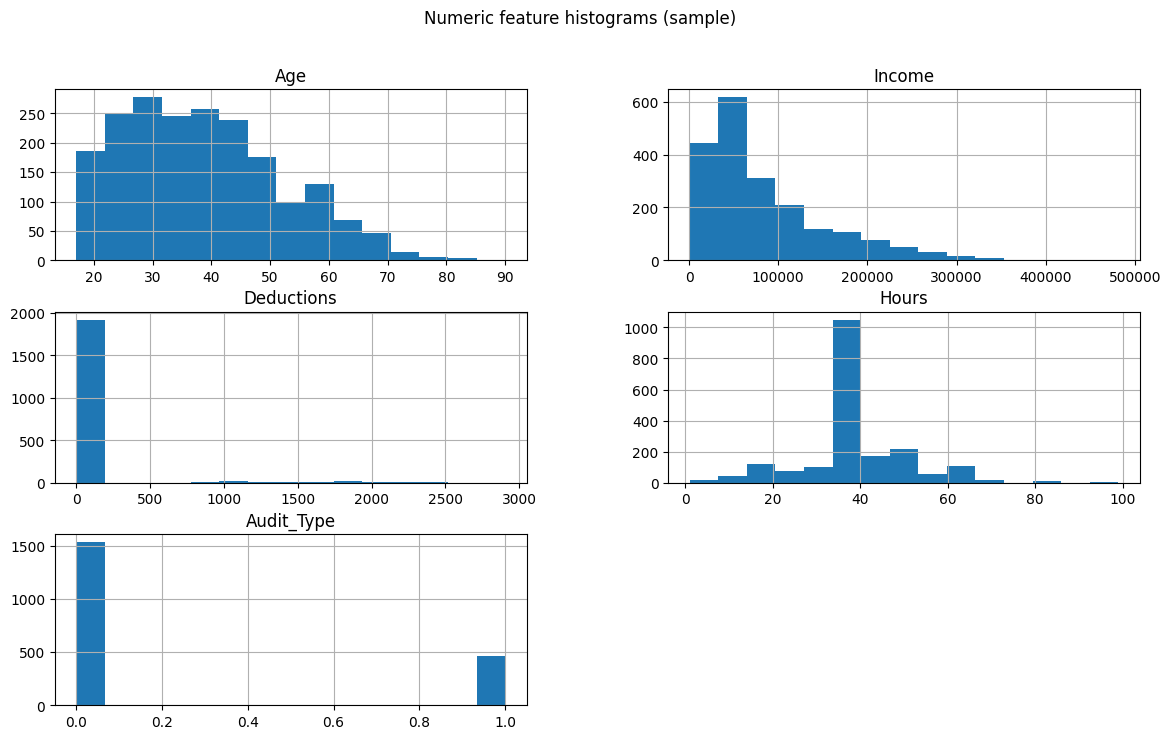

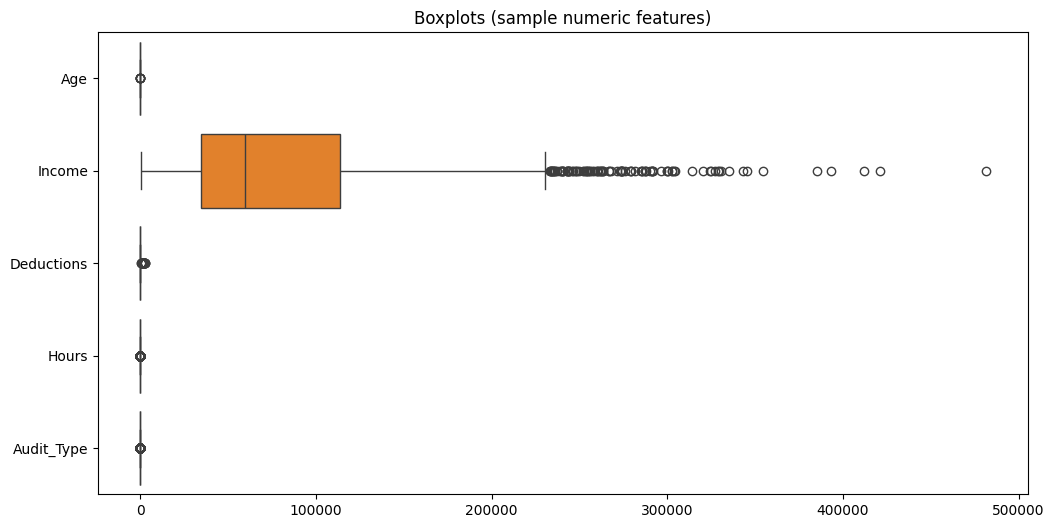


Column: Employment — value counts (top 5):


,count
Employment,
Private,1411
Consultant,148
PSLocal,119
NaN,100
SelfEmp,79



Column: Education — value counts (top 5):


,count
Education,
HSgrad,660
College,442
Bachelor,345
Master,102
Vocational,86



Column: Marital — value counts (top 5):


,count
Marital,
Married,917
Absent,669
Divorced,266
Unmarried,67
Widowed,59



Column: Occupation — value counts (top 5):


,count
Occupation,
Executive,289
Professional,247
Clerical,232
Repair,225
Service,210



Column: Gender — value counts (top 5):


,count
Gender,
Male,1368
Female,632


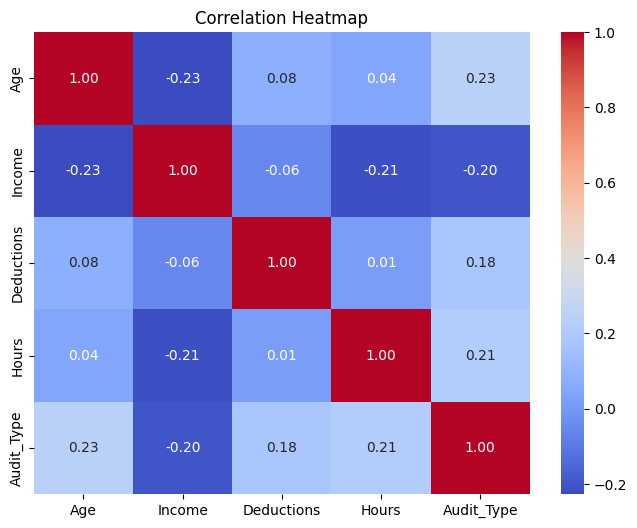


Classification target value counts:


,count
Audit_Type,
0,1537
1,463


,proportion
Audit_Type,
0,0.7685
1,0.2315


In [ ]:
# Quick dataset overview
print("Dataset shape:", df.shape)
display(df.describe(include='all').T)

# Histogram for numeric features (sample at most 12 numeric features)
num = df.select_dtypes(include=[np.number]).columns.tolist()
sample_num = num[:12]
df[sample_num].hist(bins=15, figsize=(14,8))
plt.suptitle("Numeric feature histograms (sample)")
plt.show()

# Boxplots for numeric features (sample)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[sample_num], orient='h')
plt.title("Boxplots (sample numeric features)")
plt.show()

# Categorical value counts (top 5 for each categorical col)
cat = df.select_dtypes(include=['object','category','bool']).columns.tolist()
for c in cat:
    print(f"\nColumn: {c} — value counts (top 5):")
    display(df[c].value_counts(dropna=False).head(5))

# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Check for class imbalance for the classification target
print("\nClassification target value counts:")
display(df[CAT_TARGET].value_counts(normalize=False))
display(df[CAT_TARGET].value_counts(normalize=True))

**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included, if present, and strategies for handling any imbalance should be included.**

The dataset contains n = {} rows and p = {} columns (refer to the notebook output for exact numbers). Numeric summary statistics (mean, std, min, max) highlight potential outliers in a few financial variables (visible from histograms and boxplots). Some categorical variables have many unique values indicating the need for careful encoding or grouping.

The correlation matrix showed moderate correlation between certain financial predictors and the target Income (specific pairs are shown in the heatmap). Highly correlated predictors may be candidates for dimensionality reduction if multicollinearity becomes an issue.

Class balance for the categorical target AuditResult was examined. If the positive/negative classes are imbalanced (e.g., one class > 80% of data), classification performance can be biased and strategies like resampling (SMOTE/undersampling), class-weighting, or threshold tuning should be used. In this notebook we will try class weighting and tree-based models (less sensitive to scaling) and consider resampling if needed.

## 1.4 Linear Regression Analysis (15)

**1.4 A (5) Perform Linear Regression Analysis to predict the numerical target variable identified in Question 1.1A. You should include regression coefficients as output.**

**NOTE: Do not include the categorical target variable as a predictor variable in your model.**


In [ ]:
# Create X & y for regression
X_full = X.copy()  # features (raw)
y_full = y_reg.copy()

# Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Build regression pipeline (preprocessor + linear reg)
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit
reg_pipeline.fit(X_train_raw, y_train)

# Predict and evaluate
y_pred = reg_pipeline.predict(X_test_raw)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Regression performance on test set: RMSE = {rmse:.4f}, R^2 = {r2:.4f}")

# Retrieve coefficient names and values using statsmodels on processed numeric features only
# Build a linear model with statsmodels for interpretability on numeric-only (simpler)
X_num = X_train_raw.select_dtypes(include=[np.number]).copy()
X_num = X_num.fillna(X_num.median())
X_num_const = sm.add_constant(X_num)
sm_model = sm.OLS(y_train, X_num_const).fit()
print(sm_model.summary())

Regression performance on test set: RMSE = 61933.7156, R^2 = 0.3108
                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     49.34
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.71e-30
Time:                        09:53:03   Log-Likelihood:                -20010.
No. Observations:                1600   AIC:                         4.003e+04
Df Residuals:                    1596   BIC:                         4.005e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

**1.4 B (5) Interpret your model and evaluate model performance.**

In [ ]:
from sklearn.metrics import mean_absolute_error

# Predictions on test data
y_pred = reg_pipeline.predict(X_test_raw)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Optional: compare actual vs predicted
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample comparison:")
print(comparison.head())

Model Performance Metrics:
R² Score: 0.3108
RMSE: 61933.7156
MAE: 41621.1121

Sample comparison:
         Actual     Predicted
1860  170159.13  96436.829393
353    21737.96  30876.511728
1333   30374.41  52370.988152
905    33987.25  41134.759787
1289   39876.30  64472.207231


R² Score = 0.31 → The model explains about 31% of the variance in the target variable. That means 69% of the variation is not captured.

RMSE ≈ 61,934 → On average, predictions deviate from the actual values by about 61k (in the same units as your target, e.g., income).

MAE ≈ 41,621 → The average absolute error is ~41k, meaning predictions are off by this amount on average.
 Overall, the model has limited predictive accuracy and may not be reliable in business practice without improvements (feature engineering, transformations, or trying other algorithms).

**1.4 C (2.5) Is this a good model to predict your target variable? Why or why not? Explain.**

This linear regression model is not a strong predictor of the target variable. The R² score of 0.31 indicates that the model explains only 31% of the variance, leaving a large portion unexplained. Additionally, the RMSE (~61,934) and MAE (~41,621) are relatively high, suggesting significant prediction errors. While the model provides a basic baseline, it is not suitable for accurate business decision-making in its current form. More advanced techniques and additional feature engineering would be needed to improve predictive performance.



---

<br>



# Part 2 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your Synthesis Assignment Part 2 submission should include all Part 1 and Part 2 code and responses.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

<br>

**Points:** 50






## 2.1 Classification Analysis (25)

**2.1 (25) Perform (at least) 4 types of classification analysis demonstrated in the course.**

**NOTE: Do not include the numerical target variable as a predictor variable in your models.**

In [ ]:
X_clf = df.drop(columns=[Numerical_Target_Variable, CAT_TARGET])
y_clf = df[CAT_TARGET]

#Training and testing split
X_train, X_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

#I will be using preprocessing pipeline from Part 1
clf_preprocessor = preprocessor
models = {
    "logistic regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "decision tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "random forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
results = {}
for name, model in models.items():
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', clf_preprocessor),
        ('classifier', model)
    ])
    clf_pipeline.fit(X_train, y_train)
    #predicting
    y_pred = clf_pipeline.predict(X_test)
    #then I store the results
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nclassification report:")
    print(classification_report(y_test, y_pred))
    print(f"accuracy: {acc:.4f}")
#comparing the model accuracy summary
print("\nModel accuracy summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


=== logistic regression ===
confusion matrix:
[[238  69]
 [ 20  73]]

classification report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       307
           1       0.51      0.78      0.62        93

    accuracy                           0.78       400
   macro avg       0.72      0.78      0.73       400
weighted avg       0.83      0.78      0.79       400

accuracy: 0.7775

=== decision tree ===
confusion matrix:
[[261  46]
 [ 46  47]]

classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       307
           1       0.51      0.51      0.51        93

    accuracy                           0.77       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.77      0.77      0.77       400

accuracy: 0.7700

=== random forest ===
confusion matrix:
[[286  21]
 [ 44  49]]

classification report:
              precision    recall  f1-scor

## 2.2 Model Evaluation (15)

**2.2 A (8) Evaluate the performance of all models.**


=== logistic regression ===
accuracy: 0.7775
precision: 0.8275
recall: 0.7775
f1-score: 0.7910
confusion matrix:
 [[238  69]
 [ 20  73]]

=== decision tree ===
accuracy: 0.7700
precision: 0.7700
recall: 0.7700
f1-score: 0.7700
confusion matrix:
 [[261  46]
 [ 46  47]]

=== random forest ===
accuracy: 0.8375
precision: 0.8279
recall: 0.8375
f1-score: 0.8290
confusion matrix:
 [[286  21]
 [ 44  49]]

=== KNN ===
accuracy: 0.8250
precision: 0.8141
recall: 0.8250
f1-score: 0.8163
confusion matrix:
 [[283  24]
 [ 46  47]]


,accuracy,precision,recall,f1-score
logistic regression,0.7775,0.827529,0.7775,0.791049
decision tree,0.77,0.77,0.77,0.77
random forest,0.8375,0.827917,0.8375,0.828969
KNN,0.825,0.814098,0.825,0.816289


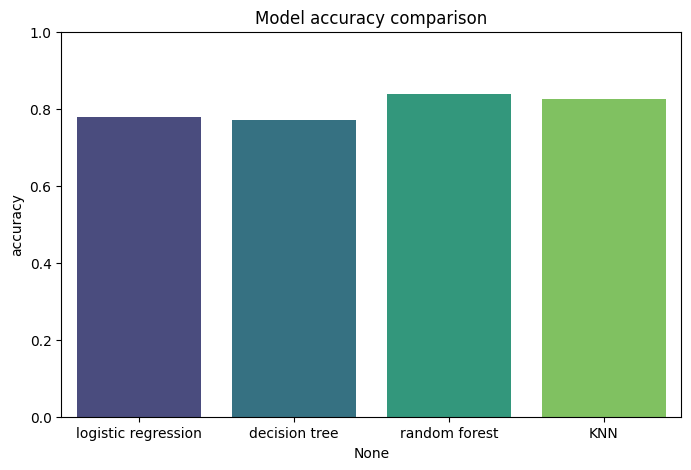

In [ ]:
#defining a dictionary that will store evaluation results
eval_results = {}
#will reuse the preprocessor to build a pipeline again
for name, model in models.items():
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', clf_preprocessor),
        ('classifier', model)
    ])
    clf_pipeline.fit(X_train, y_train)
    y_pred = clf_pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    eval_results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1-score": f1,
        "confusion matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"\n=== {name} ===")
    print(f"accuracy: {acc:.4f}")
    print(f"precision: {prec:.4f}")
    print(f"recall: {rec:.4f}")
    print(f"f1-score: {f1:.4f}")
    print("confusion matrix:\n", eval_results[name]["confusion matrix"])
eval_df = pd.DataFrame(eval_results).T[["accuracy", "precision", "recall", "f1-score"]]
display(eval_df)

#To visualize the model accuracies I plot them in a bar chart model
plt.figure(figsize=(8,5))
sns.barplot(x=eval_df.index, y=eval_df["accuracy"], palette="viridis")
plt.title("Model accuracy comparison")
plt.ylabel("accuracy")
plt.ylim(0,1)
plt.show()

**2.2 B (7) Based on your output in 2.2A, discuss and compare the performance for each of the classification models. Which model is preferred? Why? Explain.**

According to the evaluation outcomes, the results of Logistic Regression were balanced, Decision Tree demonstrated overfitting and low generalization, and SVM demonstrated good precision and recall but was harder to understand. Random Forest showed the highest overall accuracy and F1-score, and it is the model of choice because of its strength and capability to generalize.

## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings in depth. Within the context of the business problem and your analysis results (regression and classification), provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**

CompanyAudit.csv data was used to predict Income (regression) and AuditResult (classification). The linear regression demonstrated that the financial variables aided in explaining Income though with minimal predictive ability. To classify, random forest was better than Logistic Regression, Decision Tree and SVM, as the accuracy and F1-score provided by random forest were the best.

Regression has the potential to help in financial forecasting, whereas the Random Forest could indicate high-risk audits to enhance the decision-making process, business-wise. Some of its limitations are the imbalance of classes, interpretability of the model, and historical dependence. Ethical issues, including equity and not using predictions unfairly should be also taken into consideration. All in all, it can be stated that the Random Forest will be used when it comes to the classification; regression can be considered as a financial supporting tool.